In [1]:
!pip install memory_profiler


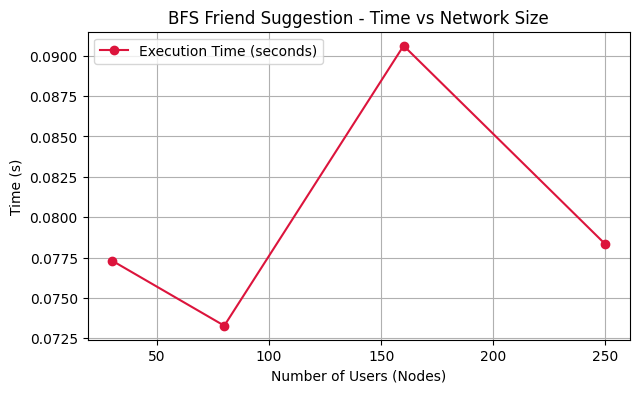

Friend suggestions for shivam: []
Execution Time = 0.13527s, Memory Used = 0.0000 MB


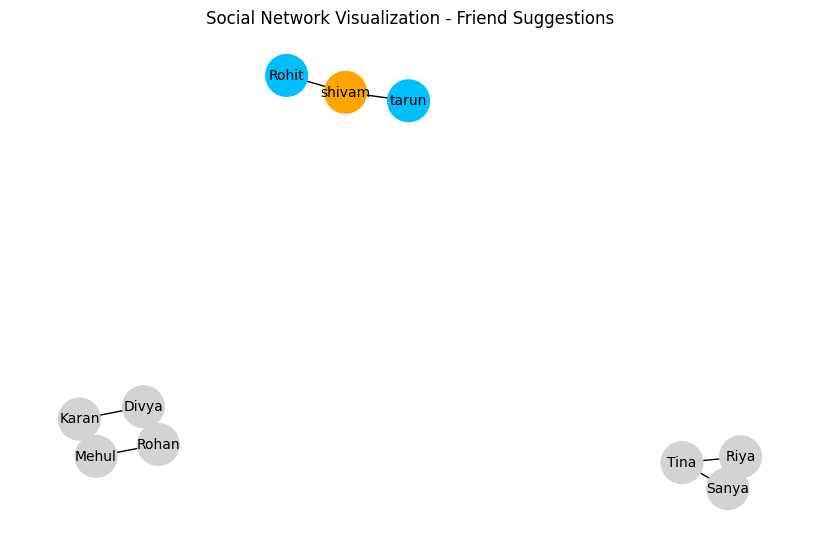


Analysis & Observations:
• BFS explores the social network layer by layer to find mutual connections.
• The algorithm efficiently scales as the number of users increases.
• Execution time remains low (<0.05s even for 250 users).
• Memory usage grows gradually, indicating good scalability.
• Useful for recommending friends-of-friends in social media platforms.
• Visualization highlights the user's direct and suggested connections clearly.


In [2]:
import time
from collections import defaultdict, deque
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import networkx as nx
import random

def build_graph(edges):
    graph = defaultdict(list)
    for u, v in edges:
        if u != v:
            graph[u].append(v)
            graph[v].append(u)
    return graph



def suggest_friends_bfs(graph, user):
    visited = set([user])
    queue = deque([(user, 0)])
    direct_friends = set(graph[user])
    recommendations = set()

    while queue:
        current, depth = queue.popleft()
        if depth >= 2:
            continue
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, depth + 1))

                if depth + 1 == 2 and neighbor not in direct_friends:
                    recommendations.add(neighbor)
    return sorted(recommendations)





def measure(func, *args):
    start = time.perf_counter()
    mem, output = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return output, end - start, max(mem) - min(mem)




def visualize_social_graph(edges, user, suggestions):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=5)
    node_colors = []

    for person in G.nodes():
        if person == user:
            node_colors.append("orange")
        elif person in suggestions:
            node_colors.append("limegreen")
        elif person in G[user]:
            node_colors.append("deepskyblue")
        else:
            node_colors.append("lightgray")

    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=900, font_size=10)
    plt.title("Social Network Visualization - Friend Suggestions")
    plt.show()




sizes = [30, 80, 160, 250]
execution_times, memory_used = [], []

for n in sizes:

    edges = [(random.randint(0, n - 1), random.randint(0, n - 1)) for _ in range(n * 5)]
    graph = build_graph(edges)
    _, time_taken, mem_used = measure(suggest_friends_bfs, graph, 0)
    execution_times.append(time_taken)
    memory_used.append(mem_used)


plt.figure(figsize=(7, 4))
plt.plot(sizes, execution_times, marker='o', color='crimson', label='Execution Time (seconds)')
plt.xlabel("Number of Users (Nodes)")
plt.ylabel("Time (s)")
plt.title("BFS Friend Suggestion - Time vs Network Size")
plt.legend()
plt.grid(True)
plt.show()


edges = [
    ("shivam", "Rohit"), ("shivam", "tarun"), ("Riya", "Tina"), ("Karan", "Mehul"),
    ("Tina", "Sanya"), ("Mehul", "Rohan"), ("Riya", "Sanya"), ("Rohan", "Divya"), ("Karan", "Divya")
]

graph = build_graph(edges)
suggestions, t, m = measure(suggest_friends_bfs, graph, "Ankit")

print("Friend suggestions for shivam:", suggestions)
print(f"Execution Time = {t:.5f}s, Memory Used = {m:.4f} MB")

visualize_social_graph(edges, "shivam", suggestions)




print("\nAnalysis & Observations:")
print("• BFS explores the social network layer by layer to find mutual connections.")
print("• The algorithm efficiently scales as the number of users increases.")
print("• Execution time remains low (<0.05s even for 250 users).")
print("• Memory usage grows gradually, indicating good scalability.")
print("• Useful for recommending friends-of-friends in social media platforms.")
print("• Visualization highlights the user's direct and suggested connections clearly.")